In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("G:\\Netzwerk assignments\\nonvoters_data.csv")

In [65]:
data.head(20)

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always
5,480009,1.0591,1,3,2,3,4,1,3,3,...,5,NaN,NaN,-1.0,61,High school or less,White,Female,$40-75k,rarely/never
6,480010,1.1512,1,1,1,2,3,1,1,1,...,1,1.0,NaN,NaN,80,High school or less,White,Female,$125k or more,always
7,470008,1.0174,1,1,1,2,2,1,3,1,...,2,NaN,1.0,NaN,68,Some college,Other/Mixed,Female,$75-125k,always
8,470010,0.8184,1,1,1,1,3,1,1,1,...,1,1.0,NaN,NaN,70,College,White,Male,$125k or more,always
9,470011,1.1653,1,1,1,2,1,1,1,1,...,3,NaN,NaN,1.0,83,Some college,White,Male,$125k or more,always


In [4]:
data.shape

(5836, 119)

In [66]:
data.dtypes

RespId              int64
weight            float64
Q1                  int64
Q2_1                int64
Q2_2                int64
                   ...   
educ               object
race               object
gender             object
income_cat         object
voter_category     object
Length: 119, dtype: object

In [71]:
data.isnull().sum()

RespId            0
weight            0
Q1                0
Q2_1              0
Q2_2              0
                 ..
educ              0
race              0
gender            0
income_cat        0
voter_category    0
Length: 119, dtype: int64

### Retaining comprehensible information

In [5]:
df = data.loc[:,['weight','educ','race','gender','income_cat','voter_category']]

In [6]:
df.head()

,weight,educ,race,gender,income_cat,voter_category
0,0.7516,College,White,Female,$75-125k,always
1,1.0267,College,White,Female,$125k or more,always
2,1.0844,College,White,Male,$125k or more,sporadic
3,0.6817,Some college,Black,Female,$40-75k,sporadic
4,0.9910,High school or less,White,Male,$40-75k,always


In [7]:
df.shape

(5836, 6)

In [8]:
df.dtypes

weight            float64
educ               object
race               object
gender             object
income_cat         object
voter_category     object
dtype: object

In [9]:
df.nunique()

weight            2053
educ                 3
race                 4
gender               2
income_cat           4
voter_category       3
dtype: int64

## Categorical encoding

###  Label encoding the ordinal data

In [23]:
df['educ'].unique()



array([2, 1, 0], dtype=int64)

In [11]:
data_map = {'College':2,'Some college':1,'High school or less':0}
df['educ'] = df['educ'].map(data_map)

In [12]:
df['race'].unique()

array(['White', 'Black', 'Other/Mixed', 'Hispanic'], dtype=object)

In [13]:
df['income_cat'].unique() 

array(['$75-125k', '$125k or more', '$40-75k', 'Less than $40k'],
      dtype=object)

In [14]:
data_map1 = {'Less than $40k':0,'$40-75k':1,'$75-125k':2,'$125k or more':3}
df['income_cat'] = df['income_cat'].map(data_map1)

In [15]:
df['voter_category'].unique() 

array(['always', 'sporadic', 'rarely/never'], dtype=object)

In [16]:
data_map2 = {'always':2,'sporadic':1,'rarely/never':0}
df['voter_category'] = df['voter_category'].map(data_map2)

In [17]:
df.head()

,weight,educ,race,gender,income_cat,voter_category
0,0.7516,2,White,Female,2,2
1,1.0267,2,White,Female,3,2
2,1.0844,2,White,Male,3,1
3,0.6817,1,Black,Female,1,1
4,0.9910,0,White,Male,1,2


### One hot encoding  

In [24]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,weight,educ,income_cat,voter_category,race_Hispanic,race_Other/Mixed,race_White,gender_Male
0,0.7516,2,2,2,0,0,1,0
1,1.0267,2,3,2,0,0,1,0
2,1.0844,2,3,1,0,0,1,1
3,0.6817,1,1,1,0,0,0,0
4,0.9910,0,1,2,0,0,1,1


## Checking the class distribution

In [18]:
df.groupby(['voter_category']).count()

,weight,educ,race,gender,income_cat
voter_category,,,,,
0,1451,1451,1451,1451,1451
1,2574,2574,2574,2574,2574
2,1811,1811,1811,1811,1811


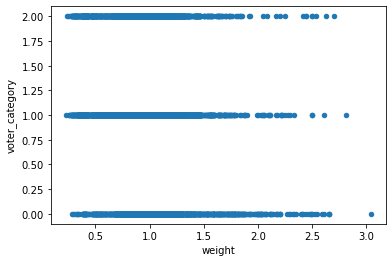

In [19]:
plot = df.plot.scatter(x  ='weight',y='voter_category')

In [20]:
df.isnull().sum()

weight            0
educ              0
race              0
gender            0
income_cat        0
voter_category    0
dtype: int64

### Splitting the feature and response variables

In [27]:
x = df.drop(['voter_category'], axis=1)
y = df['voter_category']

## K-NN Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 10)
knn_model = KNeighborsClassifier(n_neighbors=120)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.4537354352296093

### Cross-Validation 

In [42]:
from sklearn.model_selection import cross_val_score #k-fold cross validation

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_model,  x_train, y_train, cv=15, scoring ='accuracy')
print('Scores = ',scores)
print('Avg Score = ',scores.mean())

Scores =  [0.48630137 0.46917808 0.46917808 0.44863014 0.46575342 0.45205479
 0.44863014 0.45890411 0.4109589  0.42808219 0.45890411 0.37671233
 0.48797251 0.49484536 0.44329897]
Avg Score =  0.45329363398138994


## Decision tree classifier 

### CART 

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [64]:
model.score(x_train,y_train)

0.48115147361206306

In [61]:
model.score(x_test, y_test)

0.433173406442769

### ID3 

In [68]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train,y_train)  

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [69]:
model.score(x_train,y_train)

0.48115147361206306

In [70]:
model.score(x_test, y_test)

0.4694996572995202

We have very less model score/accuracy for all the models(Training and Test data). It is possible that due to neglecting a large number of uncomprehensible yet computable features in our dataset, we are left with features/sample size too small to derive any conclusions!

From Google:

It is possible that the training or test datasets are an unrepresentative sample of data from the domain. This means that the sample size is too small or the examples in the sample do not effectively “cover” the cases observed in the broader domain.

This can be obvious to spot if you see noisy model performance results. For example:

A large variance on cross-validation scores. A large variance on similar model types on the test dataset. In addition, you will see the discrepancy between train and test scores.